# Diagonal Linear Discriminant Analysis (LDA)

Assume that a classification is to be made. A generative discrete model is used for this task. Then:
$$
p\left ( y=c|\textbf{x}, \boldsymbol{\theta}\right )=\frac{p\left (\textbf{x}|y=c, \boldsymbol{\theta}\right )p\left (y=c|\boldsymbol{\theta}\right )}{p\left (\textbf{x} |\boldsymbol{\theta}\right )}
$$
Assume that a multivariate Gaussian distribution is used for $p\left (\textbf{x}|y=c, \boldsymbol{\theta}\right )$. If the covariance matrix for the multivariate Gaussian is common to all classes, then this analysis is called the linear discriminant analysis (LDA). In addition, it is assumed that the covariance matrix is diagonal. Hence, we are in the diagonal LDA. Let $p\left (\textbf{x}|y=c, \boldsymbol{\theta}\right )$ be written more explicitly:
$$
p\left (\textbf{x}|y=c, \boldsymbol{\theta}\right )=\frac{1}{\left (2\pi \right )^{D/2}\left | \boldsymbol{\Sigma} \right |^{1/2}}\exp\left [-\frac{1}{2}\left (\textbf{x}-\boldsymbol{\mu}_{c} \right)^{T}\boldsymbol{\Sigma}^{-1}\left (\textbf{x}-\boldsymbol{\mu}_{c} \right)\right ]
$$
where $\boldsymbol{\Sigma}$ is a diagonal matrix with the $j^{th}$ diagonal being equal to $\sigma_{j}^{2}$. $j$ is from $1$ to $D$. $\sigma_{j}^{2}$ is the variance of the $j^{th}$ feature.
$$
\left [\boldsymbol{\Sigma}^{-1}\left (\textbf{x}-\boldsymbol{\mu}_{c} \right)\right ]_{j} = \frac{1}{\sigma_{j}}\left ( x_{j}-\mu_{c_{j}}\right ) \Rightarrow
$$
$$
\left (\textbf{x}-\boldsymbol{\mu}_{c} \right)^{T}\boldsymbol{\Sigma}^{-1}\left (\textbf{x}-\boldsymbol{\mu}_{c} \right)=\sum_{j=1}^{D}\frac{1}{\sigma_{j}^{2}}\left ( x_{j}-\mu_{c_{j}}\right )^{2}
$$
$\mu_{c_{j}}$ is the mean of the $j^{th}$ feature for the class $c$. $\sigma_{j}$ is the variance of the $j^{th}$ feature. $\mu_{c_{j}}$ is estimated as follows:
$$
\hat{\mu}_{c_{j}}=\frac{1}{N_{c_{j}}}\sum_{i=1}^{N_{c_{j}}} x^{\left (i\right )}_{c_{j}}
$$
The $j^{th}$ feature has a variance $\sigma_{j}^{2}$. This variance can be estimated using the data from each class $c$. The unbiased estimate for the variance of the $j^{th}$ feature with the class being equal to $c$ is given by
$$
\hat{\sigma}^{2}_{c_{j}}=\frac{1}{N_{c_{j}}-1}\sum_{i:y_{i}=c} \left(x_{ij}-\hat{\mu}_{c_{j}}\right)^{2}
$$
The pooled variance is calculated using the following weighted average:
$$
\sigma_{j}^{2}=\frac{\sum_{c=1}^{C}(N_{c_{j}}-1)\hat{\sigma}^{2}_{c_{j}}}{\sum_{c=1}^{C}(N_{c_{j}}-1)}=\frac{\sum_{c=1}^{C}(N_{c_{j}}-1)\hat{\sigma}^{2}_{c_{j}}}{N-C}
$$
Let LDA be applied to a classification problem. A gene expression dataset is to be classified. There are 2308 genes, 4 classes, 63 training samples and 20 test samples. The data set named 'SRBCT microarray data' can be downloaded from https://web.stanford.edu/~hastie/ElemStatLearn/data.html. Let the data be explored using pandas first.

In [175]:
import pandas as pd
import matplotlib.pyplot as plt

In [176]:
df = pd.read_csv('./srbct_microarray/khan.xtrain', sep=None, header=None)
df = df.T

In [177]:
print('information about the dataset')
print(df.info())

information about the dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Columns: 2308 entries, 0 to 2307
dtypes: float64(2308)
memory usage: 1.1 MB
None


In [178]:
print('first few rows of the dataset')
print(df.head())

first few rows of the dataset
       0         1         2         3         4         5         6     \
0  0.773344 -2.438405 -0.482562 -2.721135 -1.217058  0.827809  1.342604   
1 -0.078178 -2.415754  0.412772 -2.825146 -0.626236  0.054488  1.429498   
2 -0.084469 -1.649739 -0.241307 -2.875286 -0.889405 -0.027474  1.159300   
3  0.965614 -2.380547  0.625297 -1.741256 -0.845366  0.949687  1.093801   
4  0.075664 -1.728785  0.852626  0.272695 -1.841370  0.327936  1.251219   

       7         8         9     ...      2298      2299      2300      2301  \
0  0.057042  0.133569  0.565427  ... -0.238511 -0.027474 -1.660205  0.588231   
1 -0.120249  0.456792  0.159053  ... -0.657394 -0.246284 -0.836325 -0.571284   
2  0.015676  0.191942  0.496585  ... -0.696352  0.024985 -1.059872 -0.403767   
3  0.819736 -0.284620  0.994732  ...  0.259746  0.357115 -1.893128  0.255107   
4  0.771450  0.030917  0.278313  ... -0.200404  0.061753 -2.273998 -0.039365   

       2302      2303      2304      2

In [179]:
print('last few rows of the dataset')
print(df.tail())

last few rows of the dataset
        0         1         2         3         4         5         6     \
58 -2.683846 -2.117767 -0.523236 -2.174192 -0.448947  0.543022  1.338731   
59 -1.207646 -2.478130  0.094310  0.273456 -1.113218 -0.283690  1.105985   
60 -1.684161 -2.053384  0.563835  0.314446 -2.052605 -0.630172  1.570967   
61 -2.258568 -2.308603 -1.443076  0.233094 -1.779633 -0.030665  1.532665   
62 -1.146333 -3.007805 -0.029326  0.237835 -2.859455  0.042293  1.318417   

        7         8         9     ...      2298      2299      2300      2301  \
58  0.194250  0.599276  0.637370  ... -1.681471 -1.036765 -0.422204 -1.400799   
59  0.801284  0.381582  0.714811  ... -0.929629 -0.258512 -1.482365 -0.827136   
60  0.137324  1.036985  0.973654  ... -0.537683 -0.497909 -0.477552 -1.427950   
61 -0.408419  0.795162  0.376242  ... -2.276917 -0.245517 -0.815315 -1.288079   
62 -0.540426  0.183071  0.503438  ... -1.711471 -0.088503  0.210180 -1.041004   

        2302      2303     

In [180]:
desc = df.describe()

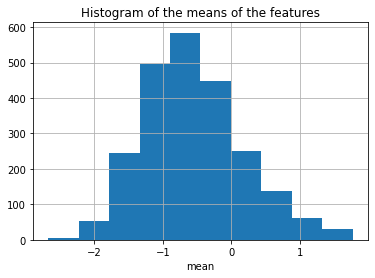

In [181]:
fig, ax = plt.subplots()
_ = desc.loc['mean'].hist()
_ = ax.set_title('Histogram of the means of the features')
_ = plt.xlabel('mean')

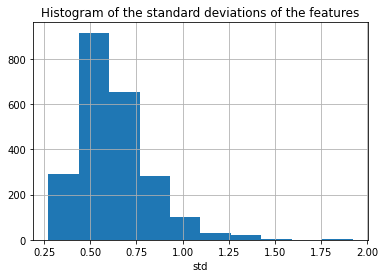

In [182]:
fig, ax = plt.subplots()
_ = desc.loc['std'].hist()
_ = ax.set_title('Histogram of the standard deviations of the features')
_ = plt.xlabel('std')

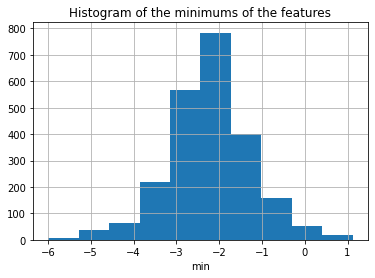

In [183]:
fig, ax = plt.subplots()
_ = desc.loc['min'].hist()
_ = ax.set_title('Histogram of the minimums of the features')
_ = plt.xlabel('min')

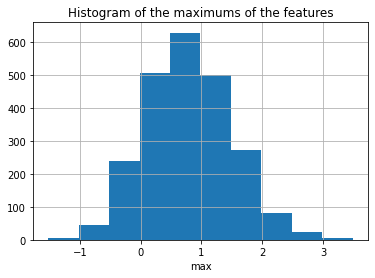

In [184]:
fig, ax = plt.subplots()
_ = desc.loc['max'].hist()
_ = ax.set_title('Histogram of the maximums of the features')
_ = plt.xlabel('max')

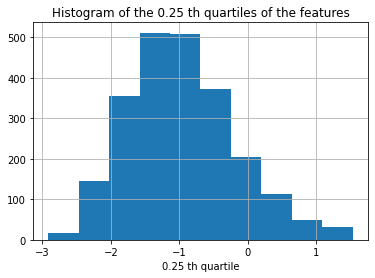

In [185]:
fig, ax = plt.subplots()
_ = desc.loc['25%'].hist()
_ = ax.set_title('Histogram of the 0.25 th quartiles of the features')
_ = plt.xlabel('0.25 th quartile')

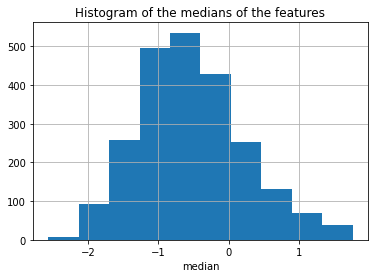

In [186]:
fig, ax = plt.subplots()
_ = desc.loc['50%'].hist()
_ = ax.set_title('Histogram of the medians of the features')
_ = plt.xlabel('median')

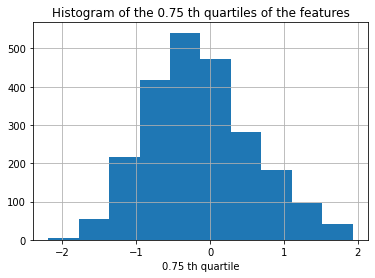

In [187]:
fig, ax = plt.subplots()
_ = desc.loc['75%'].hist()
_ = ax.set_title('Histogram of the 0.75 th quartiles of the features')
_ = plt.xlabel('0.75 th quartile')